In [120]:
from matplotlib.pyplot import cm
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.geometry import MultiLineString

In [54]:
# Download the road network
G = ox.graph_from_place('Bremen, Germany', network_type='drive')

In [114]:
# Starting and ending point of a trip
start = [8.185539352132764,38.606855578588329]
endpoints = [[53.17993104063168,20.64882960212567],[10.17993104063168,2.62882960212567]]

In [115]:
# Retrieve nearest nodes
nodes = []
for i in endpoints:
    nodes.append(ox.nearest_nodes(G, start, i))

In [117]:
# Compute the paths of the trip
route_list = []
for i in nodes: 
    route = nx.shortest_path(G, i[0], i[1], weight='length')
    route_list.append(route)

In [178]:
lengths = []
for i in nodes:
    length = nx.shortest_path_length(G, i[0], i[1], weight='length')
    lengths.append(length)

print(lengths)

[41503.817, 15084.751999999993]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


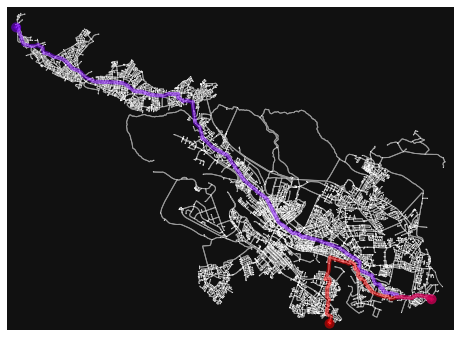

In [143]:
# Plot the trip
rc = cm.rainbow(np.linspace(0,1,len(route_list)))
fig, ax = ox.plot_graph_routes(G,
                              route_list,route_colors=rc,edge_linewidth=1,
                              node_size=1,
                              route_linewidth=6)

In [157]:
route_pairwiselist = []

for i in route_list:
    route_pairwise = zip(i[:-1], i[1:])
    route_pairwiselist.append(route_pairwise)

In [172]:
print(list(route_pairwiselist[0]))

[]


In [151]:
edges = ox.graph_to_gdfs(G, nodes=False).sort_index()

In [165]:
line_list = []

for i in route_pairwiselist:
    lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in i]
    line_list.append(lines)

In [169]:
lines1 = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwiselist[0]]

In [170]:
MultiLineString(lines1)